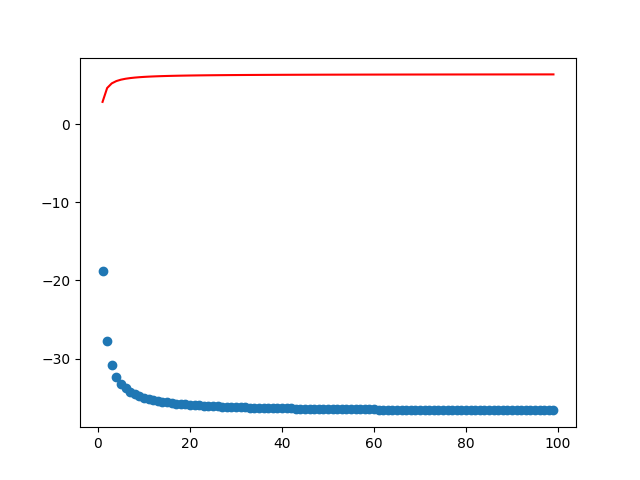

In [4]:
'''
With our guess of (1/x) we'll actually have to build a model which fits nicely into the data. 

First of all (1/x) is probably a fair guess it terms of a general shape of the function, but we must consider that its' potential parameter.
Generally, we think, the function's form is A*(1/(x+B)) + C, with A,B,C real-valued.

Now, parameter B is pretty devilish. It's very tame. Too tame even. The derivative of the chosen loss function (MSE = mean(y - ( a * (1/(x+b) + c)) with respect to b 
is -2 * mean( ( y - yhat )( -a*(x + b)**(-2) )  ), where y is the true value, yhat is the predcition, small letter a,b,c are model's current parameters. 
This means that far form true B, the derivative is miniscule, hence b is being adjusted slowly, BUT, close to true B, derivative skyrockets to infinity,
bringing us with itself on an adventure into a world of pain. 

Also, I cannot prove it yet, but I think that optimal learning rates for a and c, if b is far from true B, is order of magnitude or two smaller than for b, which isn't helpful at all.

Anyway, we'll take the easy way out and straight out assume that the function in question is nice, and it's discontinuity point is precisely at 0, thus saving us a headache.
Fortunately, data seems to be strongly pointing that way. So am I.

So, let's build us a model. It'll do gradient descend on two variables. Pretty much like standard linear regression, but instead of a linear function, we'll be popping in
a rational function.

Later, we'll use R squared to estimate how good of a fit we have. Let's assume R squared >= 0.95 is satisfactory.

Shown below is model fitting itself to a reciprocal function, with A, C randomly generated

SIDENOTE: yeah yeah. Dynamic learning rate, annealing, etc. I know. I'm getting there.
'''

'''
This line supposedly ensures that the animation works in my enviroment, which is vscode.
It was literally slapped here after a chaotic googling session, and noticing that it actually does what it's supposed to.
You might wanna adjust it to Your enviroment. How? No idea. Be strong. 
'''
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation

import numpy as np

class Model:
    def __init__(self):

        self.params = {
            'a' : np.random.uniform(-10, 10),
            'b' : 0,
            'c' : np.random.uniform(-10, 10)
        }
        self.derivatives = dict( self.params )

        for val in self.params.values():
            val = np.random.uniform( -10, 10 )

    def loss( self, Y, Yhat ):
        return np.mean( (Y - Yhat)**2 )

    def forward(self, X):

        a = self.params['a']
        b = self.params['b']
        c = self.params['c']

        Yhat = a*((X+b)**(-1)) + c
        return Yhat
        

    def backward(self, X, Y, Yhat):

        a = self.params['a']
        b = self.params['b']
        c = self.params['c']

        df = Y - Yhat

        derivatives = {}
        derivatives['a'] = -2*np.mean( np.multiply( df, (X + b)**(-1) ) )
        #derivatives['b'] = -2*np.mean( np.multiply( df, -a*(X+b)**(-2)) ) 
        derivatives['c'] = -2*np.mean( df )

        return derivatives
    
    def update_params(self, derivatives, lr):


        self.params['a'] = self.params['a'] - lr * derivatives['a']
        #self.params['b'] = self.params['b'] - lr * derivatives['b']
        self.params['c'] = self.params['c'] - lr * derivatives['c']

    def train( self, X, Y, lr ):
        Yhat = self.forward( X )
        derivatives = self.backward( X, Y, Yhat )
        self.update_params( derivatives, lr )
    

#You might wanna tweak this and see what happpend. Don't expect miracles though
A = np.random.uniform(-100,100)
C = np.random.uniform(-100,100)

X = np.arange( 1, 100, dtype=float )
Y = A * (X)**(-1) + C

EPOCHS = 1000

model = Model()



fig, ax = plt.subplots()
ax.scatter( X, Y, marker='o')
m = ax.plot( X, model.params['a']*np.reciprocal(X) + model.params['c'], color='red' )[0]

def update(frame):
    model.train( X, Y, 0.1 )
    m.set_ydata( model.params['a'] * np.reciprocal(X) + model.params['c'] )

ani = FuncAnimation( fig=fig, func=update, frames=EPOCHS, interval=1)

plt.show()

# def Rsq(Y, Yhat):
#     y = np.mean(Y)
#     SSres = np.sum((Y - Yhat)**2)
#     SStot = np.sum( (Y - y)**2 )

#     res = 1 - SSres/SStot
#     return res
    


